# Data Preprocessing

In [4]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

time series data：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

daily data

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

geting daily reports
finish
getiing data
finsh
getting data from shanghai......
finish


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

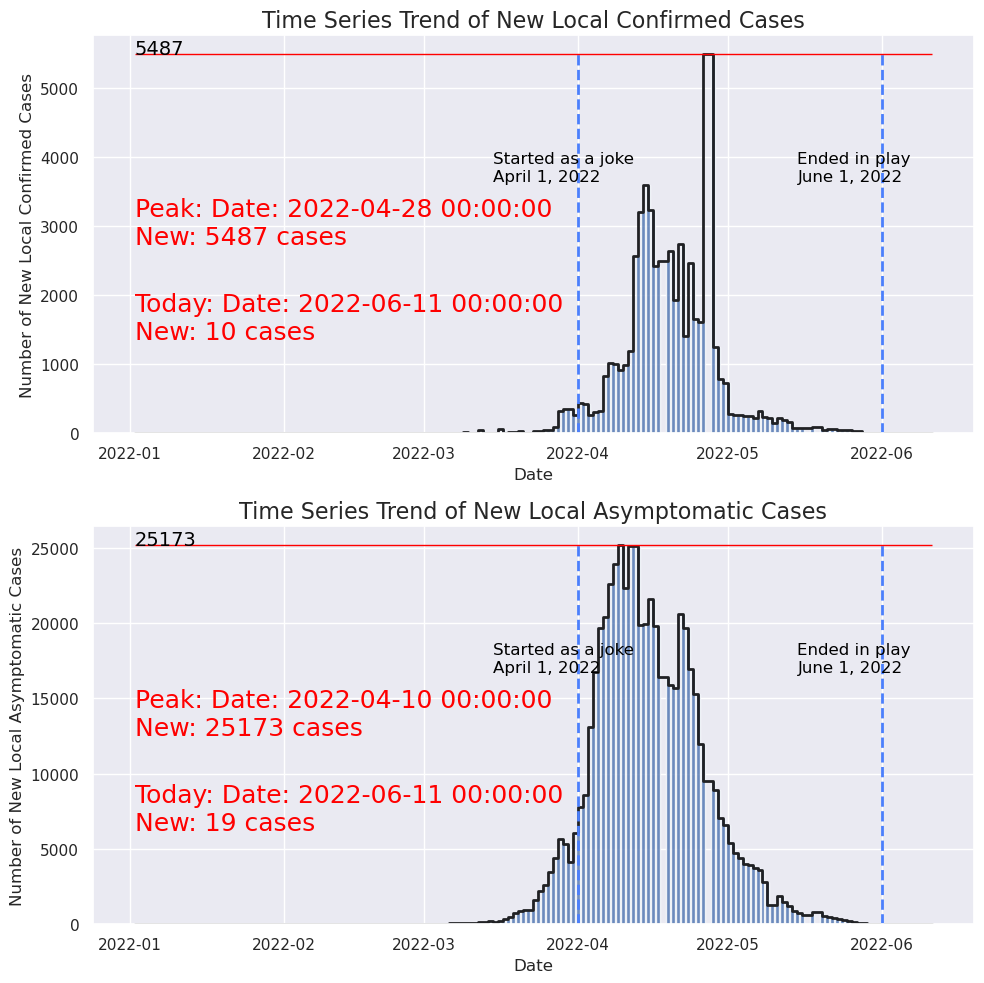

In [8]:
from get_covid_data.getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  # 

## ts_confirmed_global。

In [9]:
ts_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [10]:
# It can be seen that we can filter out all data for China based on the Country/Region, and we need to convert the horizontal dates into vertical ones. Can we try "transpose"? 
data1 = ts_confirmed_global.copy() # Do not operate in place, remember to copy
# (1) Filter out all data for China by Country/Region
data1 = data1[data1['Country/Region'] == 'China']
# (2) Set Province/State as the index
data1 = data1.set_index('Province/State')
# (3) Remove the 'Country/Region','Lat','Long' columns, we temporarily don't need them.
data1 = data1.drop(['Country/Region','Lat','Long'], axis=1)
# (4) Calculate new cases through cumulative numbers, which means, looking horizontally, subtract the previous day from the next day

### 1. axis=1 means subtract horizontally
### 2. fillna is because subtracting the previous one from the following, then the first value will become NaN, so it needs to be filled. We fill it with the original value of the first column
### 3. After filling, in order to retain the original data type and save you the trouble of converting with .astype, here we use downcast = 'infer'. For more details, see the video below!

######## Important! ########
# Whether to add .clip(lower=0) at the end depends on whether we ignore negative growth, that is, if the calculated difference is a negative value, this line of code will replace all negative values with 0.
data1 = data1.diff(axis=1).fillna({data1.columns[0]:data1[data1.columns[0]]}, downcast = 'infer') # .clip(lower=0)

# (5) We sort by the last day (i.e., the latest day) of new cases from smallest to largest, using sort_values, sorting in descending order by the value of the last column of data.
data1 = data1.sort_values(by = data1.columns[-1], ascending=False)
# (6) Transpose (equivalent to a 90-degree flip)
data1 = data1.T
# (7) Remove the Unknown column, because now the index and columns have switched, the original index was Province/State, here there is a missing value (presumably Taiwan?) called Unknown, remove it.
data1 = data1.dropna().drop('Unknown', axis=1)
# (8) Time conversion, at this point, we need to convert the time with pd.to_datetime! You are almost there! Keep going!
data1.index = pd.to_datetime(data1.index)
# (9) Remove columns name

data1.columns.name = ''

ts_data_processed = data1
# Now let's take a look at the processed data!




In [11]:
ts_data_processed

,Anhui,Shanghai,Liaoning,Macau,Ningxia,Qinghai,Shaanxi,Shandong,Shanxi,Beijing,...,Heilongjiang,Hebei,Hainan,Guizhou,Guangxi,Guangdong,Gansu,Fujian,Chongqing,Zhejiang
2020-01-22,1,9,2,1,1,0,0,2,1,14,...,0,1,4,1,2,26,0,1,6,10
2020-01-23,8,7,1,1,0,0,3,4,0,8,...,2,0,1,2,3,6,2,4,3,17
2020-01-24,6,4,1,0,1,0,2,9,0,14,...,2,1,3,0,18,21,0,5,18,16
2020-01-25,24,13,13,0,1,1,10,12,5,5,...,5,6,11,1,0,25,2,8,30,19
2020-01-26,21,7,4,3,1,0,7,19,3,27,...,6,5,3,1,13,33,3,17,18,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-03-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
def ts_process_CHINA(ts_data,clip = False):
    ts_data = ts_data[ts_data['Country/Region'] == 'China']
    # get loc
    loc_data = ts_data[['Province/State','Lat','Long']]
    loc_data = loc_data[loc_data['Province/State'] != 'Unknown']

    ts_data = ts_data.set_index('Province/State').drop(['Country/Region','Lat','Long'],axis=1)
    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T.dropna().drop('Unknown',axis=1)
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''
    sorted_provinces = ts_data.columns
    return ts_data,loc_data,sorted_provinces #### loc_data,sorted_provinces 

### US data

In [13]:
ts_confirmed_us.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


In [15]:
def ts_process_US(ts_data, death = False, clip = False):
    # get loc
    ts_data = ts_data.dropna()
    loc_data = ts_data[['UID','FIPS','Admin2','Province_State','Lat','Long_']]

    ts_data = ts_data.set_index(['Province_State','Admin2']).iloc[:,9:]
    if death:
        population = ts_data.groupby('Province_State')['Population'].sum()
        ts_data = ts_data.drop('Population',axis=1)

    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.groupby('Province_State').sum()
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''

    sorted_state = ts_data.columns

    if death:
        return ts_data,loc_data,sorted_state,population
    return ts_data,loc_data,sorted_state

In [16]:
latest_data_global.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-03-10 04:21:03,33.93911,67.709953,209451,7896,NaN,NaN,Afghanistan,538.042451,3.769855
1,NaN,NaN,NaN,Albania,2023-03-10 04:21:03,41.15330,20.168300,334457,3598,NaN,NaN,Albania,11621.968170,1.075774
2,NaN,NaN,NaN,Algeria,2023-03-10 04:21:03,28.03390,1.659600,271496,6881,NaN,NaN,Algeria,619.132366,2.534476
3,NaN,NaN,NaN,Andorra,2023-03-10 04:21:03,42.50630,1.521800,47890,165,NaN,NaN,Andorra,61981.492267,0.344540
4,NaN,NaN,NaN,Angola,2023-03-10 04:21:03,-11.20270,17.873900,105288,1933,NaN,NaN,Angola,320.352770,1.835917


In [17]:
def daily_process(daily_data, country = 'China'):
    if country == 'China':
        daily_data = daily_data[(daily_data['Country_Region'] == 'China')&(daily_data['Province_State']!='Unknown')]
    elif country == 'US':
        daily_data = daily_data
    cols_use = ['Province_State','Last_Update','Confirmed','Deaths','Incident_Rate','Case_Fatality_Ratio']

    # sorted_provinces is provided
    daily_data_processed = daily_data[cols_use].set_index(daily_data['Province_State'])
    daily_data_processed.index.name = ""
    daily_data_processed = daily_data_processed.dropna()
    return daily_data_processed

In [18]:
daily_process(latest_data_global, country = 'China')

,Province_State,Last_Update,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
,,,,,,
Anhui,Anhui,2023-03-10 04:21:03,2275,7,3.597407,0.307692
Beijing,Beijing,2023-03-10 04:21:03,40774,20,189.294336,0.049051
Chongqing,Chongqing,2023-03-10 04:21:03,14715,11,47.437137,0.074754
Fujian,Fujian,2023-03-10 04:21:03,17122,2,43.445826,0.011681
Gansu,Gansu,2023-03-10 04:21:03,1742,2,6.605992,0.114811
Guangdong,Guangdong,2023-03-10 04:21:03,103248,10,90.999471,0.009685
Guangxi,Guangxi,2023-03-10 04:21:03,13371,2,27.143727,0.014958
Guizhou,Guizhou,2023-03-10 04:21:03,2534,2,7.038889,0.078927
Hainan,Hainan,2023-03-10 04:21:03,10483,6,112.237687,0.057236


In [20]:
from get_covid_data.data_processing import ts_process_CHINA,ts_process_US,daily_process

In [21]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [22]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [23]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')